# Assignment 1: Policy Iteration in the Repeated Prisoner's Dilemma

## Part I: Build the Environment
We have implemented the `RPDEnv` class in `rpd_env.py`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rpd_env import RPDEnv, COOPERATE, DEFECT
from policy_iteration import policy_iteration

# Helper function to print policy nicely
def print_policy(policy, env):
    print("Optimal Policy:")
    for s_idx, action in enumerate(policy):
        state = env.idx_to_state[s_idx]
        action_str = "C" if action == COOPERATE else "D"
        print(f"State {state}: {action_str}")

## Part II: Define the MDP
We will generate and report the State Space, Transition Probabilities, and Rewards for each scenario.

In [2]:
strategies = ['ALL-C', 'ALL-D', 'TFT', 'Imperfect-TFT']
memory_depths = [1, 2]

for depth in memory_depths:
    print(f"\n--- Memory Depth {depth} ---")
    for strategy in strategies:
        print(f"\nOpponent: {strategy}")
        env = RPDEnv(opponent_strategy=strategy, memory_depth=depth)
        P, R = env.get_mdp()
        
        print(f"Number of States: {len(env.states)}")
        # Print a few transitions and rewards as examples
        print("Sample Transitions (State 0, Action C):")
        for next_s in range(len(env.states)):
            if P[0, COOPERATE, next_s] > 0:
                print(f"  -> State {env.idx_to_state[next_s]} with prob {P[0, COOPERATE, next_s]}")
        
        print(f"Reward at State 0, Action C: {R[0, COOPERATE]}")


--- Memory Depth 1 ---

Opponent: ALL-C
Number of States: 4
Sample Transitions (State 0, Action C):
  -> State (0, 0) with prob 1.0
Reward at State 0, Action C: 3.0

Opponent: ALL-D
Number of States: 4
Sample Transitions (State 0, Action C):
  -> State (0, 1) with prob 1.0
Reward at State 0, Action C: 0.0

Opponent: TFT
Number of States: 4
Sample Transitions (State 0, Action C):
  -> State (0, 0) with prob 1.0
Reward at State 0, Action C: 3.0

Opponent: Imperfect-TFT
Number of States: 4
Sample Transitions (State 0, Action C):
  -> State (0, 0) with prob 0.9
  -> State (0, 1) with prob 0.1
Reward at State 0, Action C: 2.7

--- Memory Depth 2 ---

Opponent: ALL-C
Number of States: 16
Sample Transitions (State 0, Action C):
  -> State ((0, 0), (0, 0)) with prob 1.0
Reward at State 0, Action C: 3.0

Opponent: ALL-D
Number of States: 16
Sample Transitions (State 0, Action C):
  -> State ((0, 0), (0, 1)) with prob 1.0
Reward at State 0, Action C: 0.0

Opponent: TFT
Number of States: 16
Samp

## Part III: Policy Iteration
We have implemented the algorithm in `policy_iteration.py`.

## Part IV: Experiments & Analysis

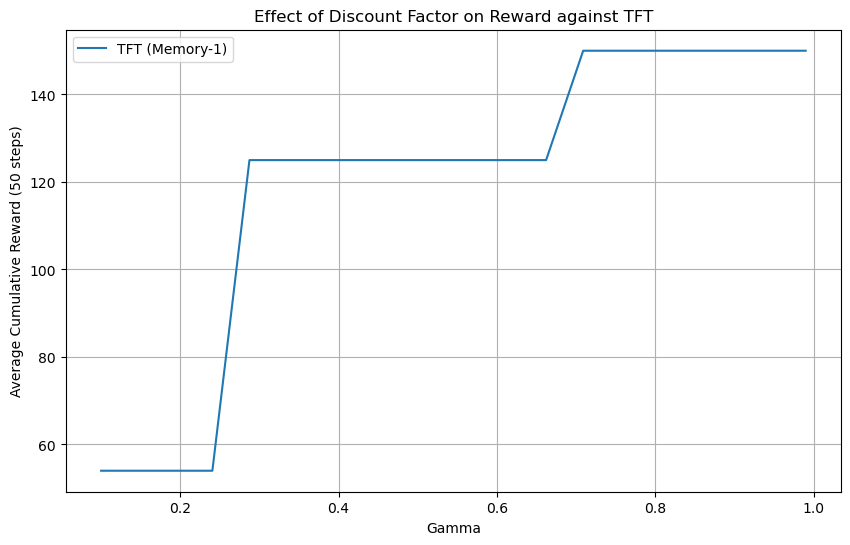

Policies against TFT at different gammas:
Gamma 0.10: [1 1 1 1]
Gamma 0.15: [1 1 1 1]
Gamma 0.19: [1 1 1 1]
Gamma 0.24: [1 1 1 1]
Gamma 0.29: [1 1 0 0]
Gamma 0.33: [1 1 0 0]
Gamma 0.38: [1 1 0 0]
Gamma 0.43: [1 1 0 0]
Gamma 0.47: [1 1 0 0]
Gamma 0.52: [1 1 0 0]
Gamma 0.57: [1 1 0 0]
Gamma 0.62: [1 1 0 0]
Gamma 0.66: [1 1 0 0]
Gamma 0.71: All Cooperate
Gamma 0.76: All Cooperate
Gamma 0.80: All Cooperate
Gamma 0.85: All Cooperate
Gamma 0.90: All Cooperate
Gamma 0.94: All Cooperate
Gamma 0.99: All Cooperate


In [3]:
def run_experiment(opponent, depth, gamma_values):
    rewards = []
    policies = []
    
    env = RPDEnv(opponent_strategy=opponent, memory_depth=depth)
    P, R = env.get_mdp()
    
    for gamma in gamma_values:
        # Pass states list for potential plotting (verbose=False by default)
        policy, V = policy_iteration(P, R, gamma=gamma, states=env.states)
        policies.append(policy)
        
        # Calculate average reward over 50 episodes
        total_reward = 0
        num_episodes = 50
        steps_per_episode = 50
        
        for _ in range(num_episodes):
            state_idx, _ = env.reset()
            episode_reward = 0
            for _ in range(steps_per_episode):
                action = policy[state_idx]
                next_state_idx, reward, _, _, _ = env.step(action)
                episode_reward += reward
                state_idx = next_state_idx
            total_reward += episode_reward
            
        avg_reward = total_reward / num_episodes
        rewards.append(avg_reward)
        
    return rewards, policies

# 1. The Discount Factor Analysis
gammas = np.linspace(0.1, 0.99, 20)
rewards_tft, policies_tft = run_experiment('TFT', 1, gammas)

plt.figure(figsize=(10, 6))
plt.plot(gammas, rewards_tft, label='TFT (Memory-1)')
plt.xlabel('Gamma')
plt.ylabel('Average Cumulative Reward (50 steps)')
plt.title('Effect of Discount Factor on Reward against TFT')
plt.legend()
plt.grid(True)
plt.show()

# Check when cooperation becomes optimal
# Cooperation against TFT yields 3 per step -> 150 total
# Defection against TFT yields 5 then 1s -> 5 + 49 = 54 total (approx)
# Wait, if I defect, TFT defects next. If I keep defecting, we get P=1.
# If I cooperate, we get R=3.
print("Policies against TFT at different gammas:")
for g, p in zip(gammas, policies_tft):
    # Check if policy is all cooperate (0)
    is_coop = np.all(p == COOPERATE)
    print(f"Gamma {g:.2f}: {'All Cooperate' if is_coop else p}")

In [4]:
# 2. Memory Depth Analysis
print("Comparing Memory-1 vs Memory-2 against all opponents (Gamma=0.9)")
gamma = 0.9

for strategy in strategies:
    print(f"\nOpponent: {strategy}")
    for depth in [1, 2]:
        env = RPDEnv(opponent_strategy=strategy, memory_depth=depth)
        P, R = env.get_mdp()
        policy, V = policy_iteration(P, R, gamma=gamma, states=env.states)
        
        # Simulation
        total_reward = 0
        for _ in range(50):
            state_idx, _ = env.reset()
            for _ in range(50):
                action = policy[state_idx]
                next_state_idx, reward, _, _, _ = env.step(action)
                total_reward += reward
                state_idx = next_state_idx
        print(f"  Memory-{depth} Avg Reward: {total_reward/50}")

Comparing Memory-1 vs Memory-2 against all opponents (Gamma=0.9)

Opponent: ALL-C
  Memory-1 Avg Reward: 250.0
  Memory-2 Avg Reward: 250.0

Opponent: ALL-D
  Memory-1 Avg Reward: 50.0
  Memory-2 Avg Reward: 50.0

Opponent: TFT
  Memory-1 Avg Reward: 150.0
  Memory-2 Avg Reward: 150.0

Opponent: Imperfect-TFT
  Memory-1 Avg Reward: 134.94
  Memory-2 Avg Reward: 134.76


In [5]:
# 3. Noise Analysis
print("\nNoise Analysis: TFT vs Imperfect-TFT (Memory-1, Gamma=0.9)")
gamma = 0.9

for strategy in ['TFT', 'Imperfect-TFT']:
    env = RPDEnv(opponent_strategy=strategy, memory_depth=1)
    P, R = env.get_mdp()
    policy, V = policy_iteration(P, R, gamma=gamma, states=env.states)
    
    print(f"\nStrategy: {strategy}")
    print_policy(policy, env)
    
    # Simulation
    total_reward = 0
    for _ in range(50):
        state_idx, _ = env.reset()
        for _ in range(50):
            action = policy[state_idx]
            next_state_idx, reward, _, _, _ = env.step(action)
            total_reward += reward
            state_idx = next_state_idx
    print(f"  Avg Reward: {total_reward/50}")


Noise Analysis: TFT vs Imperfect-TFT (Memory-1, Gamma=0.9)

Strategy: TFT
Optimal Policy:
State (0, 0): C
State (0, 1): C
State (1, 0): C
State (1, 1): C
  Avg Reward: 150.0

Strategy: Imperfect-TFT
Optimal Policy:
State (0, 0): C
State (0, 1): C
State (1, 0): C
State (1, 1): C
  Avg Reward: 135.9
